<a href="https://colab.research.google.com/github/Poorya0071/Introduction-to-clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The aim of this notebook is to represent clustering with a simple example.

Let's import the california housing dataset.

In [1]:
import pandas as pd
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


plot the location of the house,

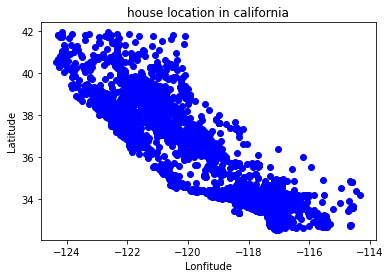

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data['longitude'], data['latitude'], color = 'b')
plt.xlabel('Lonfitude')
plt.ylabel('Latitude')
plt.title("house location in california")
plt.show()

select the long and lat col for the clustering.

In [9]:
data_kluster = pd.DataFrame()
data_kluster['longitude'] = data['longitude']
data_kluster['latitude'] = data['latitude']
data_kluster.head()

,longitude,latitude
0,-114.31,34.19
1,-114.47,34.40
2,-114.56,33.69
3,-114.57,33.64
4,-114.57,33.57


create a function to find the best number of clusters.

In [33]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data_kluster)
x_scaled

array([[ 2.619365  , -0.67152023, -1.67728843],
       [ 2.53956878, -0.57326437, -1.67728843],
       [ 2.4946834 , -0.90546278, -1.67728843],
       ...,
       [-2.36291168,  2.90780067, -0.77107825],
       [-2.36291168,  2.88908527, -0.77107825],
       [-2.387848  ,  2.29955006, -0.77107825]])

In [34]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[50999.99999999956,
 16505.278411016297,
 5117.91318527472,
 2725.462017856038,
 2015.3394297390093,
 1564.243304912398,
 1383.513109053691,
 1241.6563925060018,
 1118.3206201243029]

Text(0, 0.5, 'WCSS')

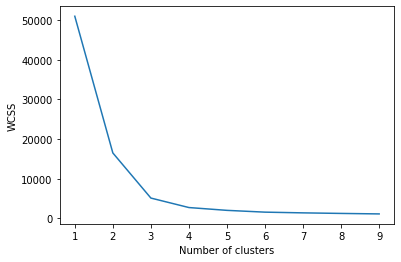

In [35]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [28]:
from sklearn.cluster import KMeans
kmean = KMeans(4)
kmean.fit(data_kluster)

KMeans(n_clusters=4)

add clusters to the dataframe

In [29]:
data_kluster['cluster_num'] = kmean.fit_predict(data_kluster)
data_kluster.head()

,longitude,latitude,cluster_num
0,-114.31,34.19,0
1,-114.47,34.40,0
2,-114.56,33.69,0
3,-114.57,33.64,0
4,-114.57,33.57,0


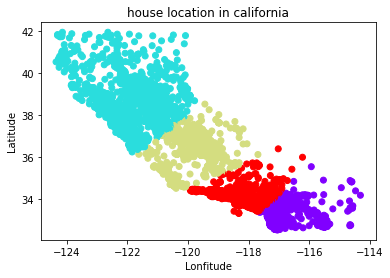

In [32]:
plt.scatter(data_kluster['longitude'], data_kluster['latitude'], c = data_kluster['cluster_num'], cmap ='rainbow')
plt.xlabel('Lonfitude')
plt.ylabel('Latitude')
# plt.legend()
plt.title("house location in california")
# plt.xlim([-180,180])
# plt.ylim([90,90])
plt.show()